In [1]:
import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display
from sklearn.metrics import roc_auc_score

import utils
plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
new_features_m = utils.load('fma_metadata/new_features_m.csv')

In [4]:
new_features_m

feature    chroma_stft       mfcc                                    \
statistics        mean        max                                     
number              01         01         03          04         07   
track_id                                                              
2             0.696063  28.657707  52.424423  103.289833  37.843021   
3             0.449602  29.380682  76.742714  137.245010  55.662521   
5             0.481160 -40.500740  50.373932  112.312531  29.266182   
10            0.388109  20.196968  60.412815   78.466721  21.597277   
134           0.438062 -41.723225  58.687328  125.922821  37.450359   
...                ...        ...        ...         ...        ...   
155297        0.408626   3.826046  94.208336   48.085751  26.723190   
155298        0.439034 -72.790154  81.013275  124.569000  29.571426   
155306        0.369401  -7.814734  88.024063  116.180260  29.388819   
155307        0.357939 -13.889938  62.219879   93.028778  41.311356   
155314        0.551894 -15.305521  32.737503   95.054657  25.620636   

feature                                                                ...  \
statistics                   mean           min                        ...   
number             11          02            02         04         05  ...   
track_id                                                               ...   
2           27.737400  116.696678 -1.421085e-14 -51.569004 -97.879890  ...   
3           26.740063  120.158501 -1.851665e+01 -12.548506 -87.048355  ...   
5           27.197964  132.215073 -6.228398e+01 -24.319845 -74.060310  ...   
10          24.780317  157.040085  5.151435e-14 -50.578659 -45.113949  ...   
134         36.486378  125.521309 -9.427860e-01 -90.334747 -67.671829  ...   
...               ...         ...           ...        ...        ...  ...   
155297      19.866936  163.954620 -1.776357e-14 -29.221125 -28.104187  ...   
155298      38.472843  160.770218 -7.993606e-14  -7.314378 -69.236115  ...   
155306      47.185654  177.614151  5.329071e-15 -49.451691 -70.841232  ...   
155307      33.690544  124.228142 -5.892177e+00 -50.547176 -99.119080  ...   
155314      34.402496  166.692734 -2.464827e-01 -55.172737 -55.477066  ...   

feature                                                spectral_bandwidth  \
statistics      skew         std                                 kurtosis   
number            04          01         02         04                 01   
track_id                                                                    
2           0.043292   97.809044  38.569584  20.767921           3.874384   
3          -0.026875  111.686371  41.191982  22.025253           2.383340   
5          -0.108640   95.049904  39.367599  24.319347           0.895442   
10         -0.561734  102.743553  44.409843  14.013119           0.437628   
134        -0.479446  102.779747  47.266518  36.841534           0.372903   
...              ...         ...        ...        ...                ...   
155297      0.369148   91.869461  30.287067  12.060067          20.706787   
155298      0.602545   94.696381  39.359367  18.604885           5.868375   
155306      0.172813  109.087029  40.537926  28.671246           4.375974   
155307     -0.412079   80.234474  35.382370  22.123117          -0.383395   
155314     -1.755459   64.040298  26.786989  22.369673           0.011010   

feature    spectral_contrast                        tonnetz         class  
statistics               max                  min       std         genre  
number                    03         04        02        01           top  
track_id                                                                   
2                  39.333603  31.513493  2.296826  0.019809       Hip-Hop  
3                  42.141411  31.473713  0.652681  0.026316       Hip-Hop  
5                  39.017235  33.707951  2.314010  0.025550       Hip-Hop  
10                 45.410881  28.711344  4.415900  0.021413           Pop  

In [5]:
new_features_m.describe()

feature      chroma_stft          mfcc                              \
statistics          mean           max                               
number                01            01            03            04   
count       24752.000000  24752.000000  24752.000000  24752.000000   
mean            0.462820    -19.739164     77.155565     97.537454   
std             0.124470     78.595673     30.092701     27.291744   
min             0.043093   -507.299744    -30.635883     -2.728852   
25%             0.380210    -54.738927     56.419287     82.499832   
50%             0.461813     -1.761191     78.740192     99.390228   
75%             0.544683     33.919375     98.783426    115.557491   
max             0.966509    179.631500    205.919037    197.193283   

feature                                                             \
statistics                                      mean           min   
number                07            11            02            02   
count       24752.000000  2.475200e+04  24752.000000  2.475200e+04   
mean           39.109809  3.256917e+01    145.709898 -1.362462e+01   
std            13.491475  1.005761e+01     31.338372  2.883210e+01   
min            -2.436376 -3.552714e-15     22.265581 -1.957686e+02   
25%            30.249963  2.588042e+01    125.398903 -1.944841e+01   
50%            38.260269  3.163607e+01    146.420258 -5.773160e-14   
75%            46.981934  3.841571e+01    165.888699 -1.509903e-14   
max           114.697556  9.122163e+01    268.769104  1.512776e+02   

feature                                                             \
statistics                                                    skew   
number                04            05            11            04   
count       24752.000000  24752.000000  2.475200e+04  24752.000000   
mean          -43.837038    -57.035541 -3.685112e+01     -0.237978   
std            24.286109     19.012952  9.943079e+00      0.624714   
min          -171.153671   -148.292572 -1.189717e+02     -3.675967   
25%           -57.948767    -69.130898 -4.279000e+01     -0.593533   
50%           -41.941446    -56.629786 -3.592866e+01     -0.204112   
75%           -26.764356    -44.315291 -2.994685e+01      0.149183   
max            17.728764      4.254468  4.440892e-15      3.095803   

feature                                              spectral_bandwidth  \
statistics           std                                       kurtosis   
number                01            02            04                 01   
count       24752.000000  24752.000000  24752.000000       24752.000000   
mean           83.114704     37.158141     19.855298           6.403274   
std            23.294001     10.364316      5.871325          20.139884   
min             9.782759      5.350976      4.212995          -1.798091   
25%            67.220079     29.763688     15.659134          -0.117253   
50%            82.472355     36.385450     19.232003           1.201077   
75%            97.971682     43.414961     23.317325           4.847691   
max           207.248276     90.620277     56.097038         397.866333   

feature    spectral_contrast                                   tonnetz  
statistics               max                         min           std  
number                    03            04            02            01  
count           24752.000000  24752.000000  24752.000000  24752.000000  
mean               42.827968     36.101968      3.086713      0.029819  
std                 4.827466      4.947858      1.239569      0.007474  
min                26.890791     20.860943      0.000000      0.012802  
25%                39.443692     32.667146      2.217484      0.024572  
50%                42.492367     35.675320      3.239208      0.028340  
75%                45.744214     39.057682      3.974168      0.033690  
max                66.939758     62.765156      8.669631      0.081450

In [6]:
attributes = [col for col in new_features_m.columns if col != ('class', 'genre', 'top')]

In [7]:
scaler= StandardScaler()

In [8]:
X = new_features_m[attributes].values
X = scaler.fit_transform(X)
y = new_features_m[('class', 'genre', 'top')]

In [9]:
y.value_counts()

Rock                   7085
Electronic             6238
Hip-Hop                2197
Experimental           2153
Folk                   1516
Instrumental           1323
Pop                    1182
International          1013
Classical               618
Old-Time / Historic     502
Jazz                    382
Country                 178
Soul-RnB                154
Spoken                  116
Blues                    74
Easy Listening           21
Name: (class, genre, top), dtype: int64

## Gaussian Mixture

In [10]:
from sklearn.mixture import GaussianMixture
from collections import Counter
from sklearn.metrics import silhouette_score

In [28]:
gauss=GaussianMixture(n_components=5, covariance_type='full', random_state=0)

In [29]:
gauss.fit(X)

GaussianMixture(n_components=5, random_state=0)

In [30]:
labels= gauss.predict(X)

In [62]:
bic=[]
sil=[]
for n in range(2,10+1):
    gauss=GaussianMixture(n_components=n, covariance_type='tied', random_state=0)
    gauss.fit(X)
    bic.append(gauss.bic(X))
    sil.append(silhouette_score(X, gauss.predict(X), metric='euclidean'))

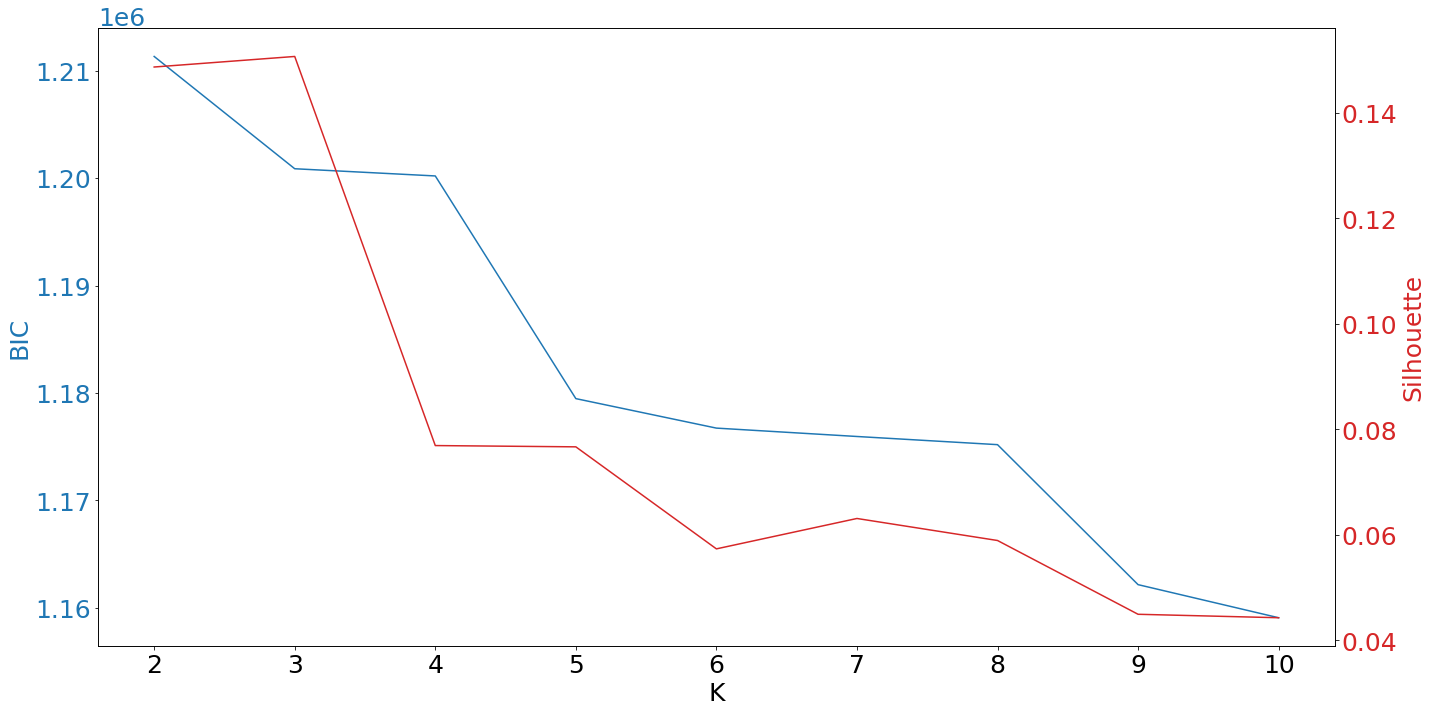

In [63]:
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
fig, ax1 = plt.subplots(figsize=(20, 10))
t = np.arange(2, 11, 1)
color = 'tab:blue'
ax1.set_xlabel('K')
ax1.set_ylabel('BIC', color=color)
ax1.plot(t, bic, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Silhouette', color=color)  # we already handled the x-label with ax1
ax2.plot(t, sil, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [58]:
gauss=GaussianMixture(n_components=2, covariance_type='full', random_state=0)
gauss.fit(X)
print(gauss.bic(X), silhouette_score(X, gauss.predict(X), metric='euclidean'))

1034119.3436628524 0.06459319641007151


In [147]:
gauss=GaussianMixture(n_components=2, covariance_type='tied', random_state=0)
gauss.fit(X)
print(gauss.bic(X), silhouette_score(X, gauss.predict(X), metric='euclidean'))

1211332.8920569937 0.14872930734273976


In [60]:
gauss=GaussianMixture(n_components=2, covariance_type='diag', random_state=0)
gauss.fit(X)
print(gauss.bic(X), silhouette_score(X, gauss.predict(X), metric='euclidean'))

1192827.7319759096 0.07135785601521442


In [61]:
gauss=GaussianMixture(n_components=2, covariance_type='spherical', random_state=0)
gauss.fit(X)
print(gauss.bic(X), silhouette_score(X, gauss.predict(X), metric='euclidean'))

1347834.1342599946 0.14846962805805627


## K-Means

In [11]:
from sklearn.cluster import KMeans

In [135]:
sse=[]
sil=[]
for k in range(2,10):
    kmeans= KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    sil.append(silhouette_score(X, kmeans.labels_, metric='euclidean'))

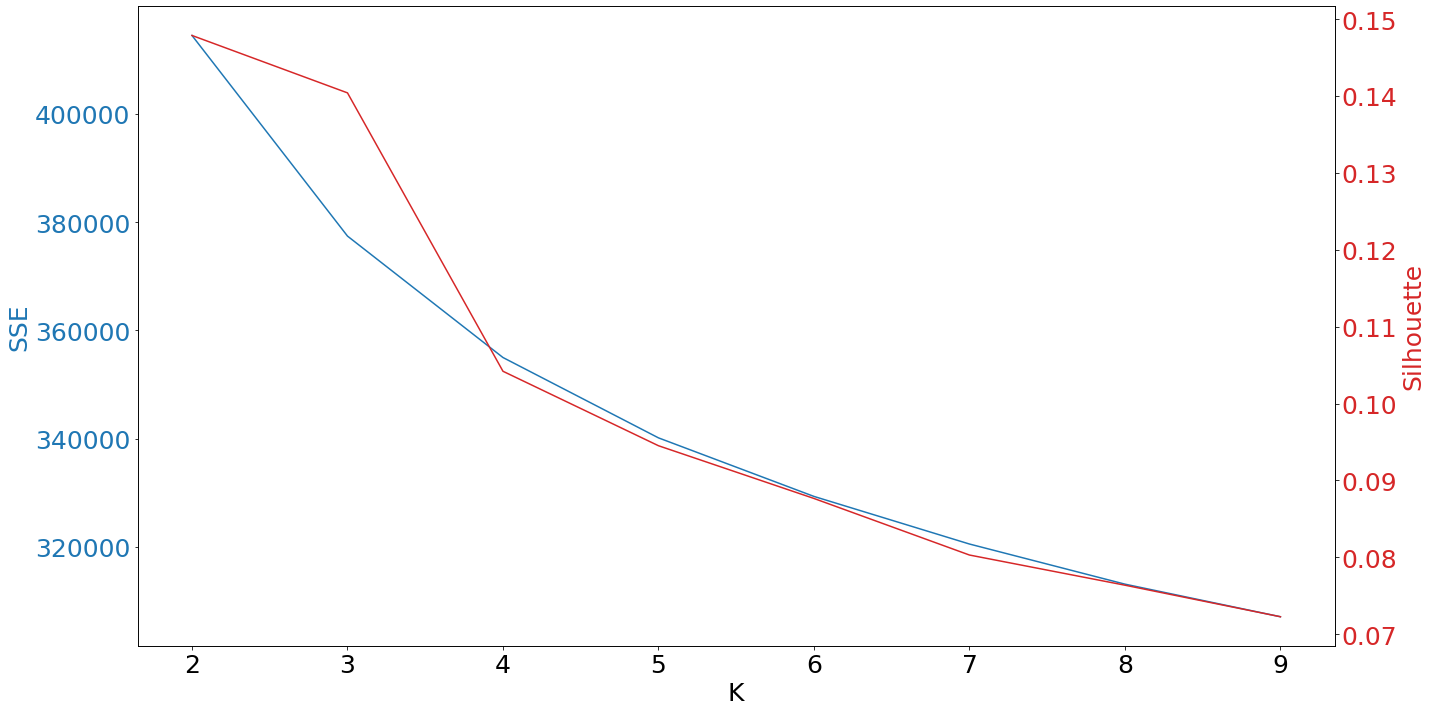

In [139]:
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
fig, ax1 = plt.subplots(figsize=(20, 10))
t = np.arange(2, 10, 1)
color = 'tab:blue'
ax1.set_xlabel('K')
ax1.set_ylabel('SSE', color=color)
ax1.plot(t, sse, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Silhouette', color=color)  # we already handled the x-label with ax1
ax2.plot(t, sil, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [148]:
kmeans= KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
silhouette_score(X, kmeans.labels_, metric='euclidean')

0.1478903321494346

In [152]:
Counter(kmeans.labels_==gauss.predict(X))

Counter({False: 8361, True: 16391})

## X-Means

In [12]:
from pyclustering.cluster import xmeans
from pyclustering.cluster.xmeans import splitting_type

In [141]:
xm = xmeans.xmeans(X, kmax=50)
xm.process()

In [142]:
clusters = xm.get_clusters()

In [143]:
centers = xm.get_centers()

In [144]:
len(clusters)

38

In [145]:
labels= xm.predict(X)

In [146]:
silhouette_score(X, labels, metric='euclidean')

0.047619977652892165

In [126]:
xm = xmeans.xmeans(X, kmax=50, criterion=splitting_type.MINIMUM_NOISELESS_DESCRIPTION_LENGTH)
xm.process()

In [127]:
clusters = xm.get_clusters()

In [128]:
centers = xm.get_centers()

In [129]:
len(clusters)

2

In [130]:
labels= xm.predict(X)

In [131]:
silhouette_score(X, labels, metric='euclidean')

0.1479872437515652

## DBScan

In [11]:
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

In [244]:
dist = pdist(X, 'euclidean')
dist = squareform(dist)

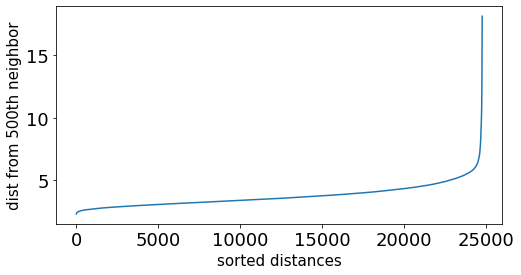

In [246]:
k = 500
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])
plt.figure(figsize=(8,4))
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=15)
plt.xlabel('sorted distances', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

In [233]:
dbscan= DBSCAN(eps=6, min_samples=500, metric='euclidean')

In [234]:
dbscan.fit(X)

DBSCAN(eps=6, min_samples=500)

In [235]:
Counter(dbscan.labels_)

Counter({0: 24692, -1: 60})

## OPTICS

In [12]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan

In [68]:
optics = OPTICS(min_samples=100, max_eps=20, cluster_method='dbscan')
optics.fit(X)

OPTICS(cluster_method='dbscan', max_eps=20, min_samples=100)

In [69]:
Counter(optics.labels_)

Counter({0: 24752})

In [70]:
optics.reachability_[optics.ordering_]

array([       inf, 3.23951637, 2.7993357 , ..., 7.35115501, 7.57835807,
       7.6519944 ])

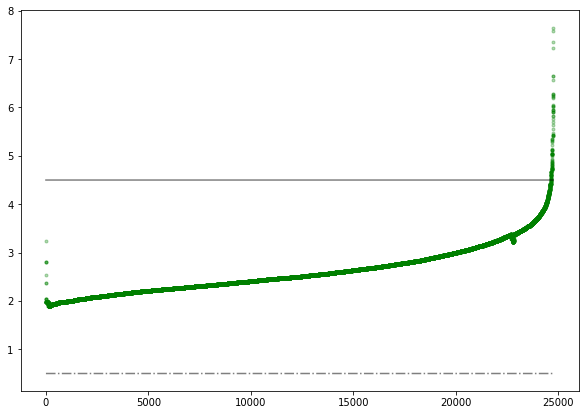

In [71]:
space = np.arange(len(X))
reachability = optics.reachability_[optics.ordering_]
labels = optics.labels_[optics.ordering_]

plt.figure(figsize=(10, 7))

colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    plt.plot(Xk, Rk, color, alpha=0.3)
plt.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
plt.plot(space, np.full_like(space, 4.5, dtype=float), 'k-', alpha=0.5)
plt.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)

In [72]:
clust= cluster_optics_dbscan(reachability=optics.reachability_,
                                   core_distances=optics.core_distances_,
                                   ordering=optics.ordering_, eps=4)

In [73]:
Counter(clust)

Counter({0: 24394, -1: 358})

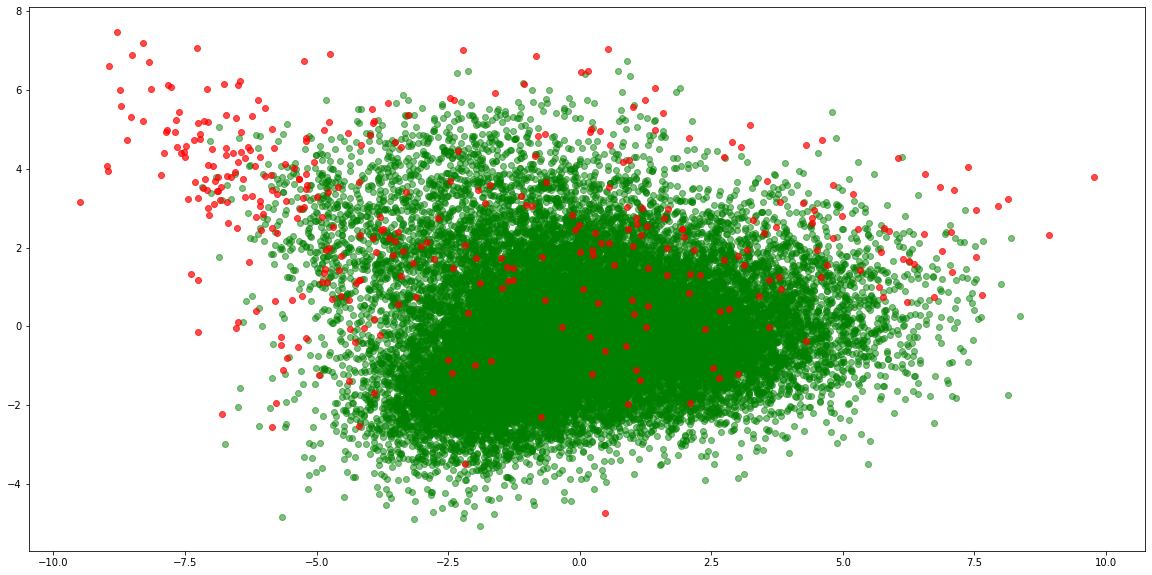

In [74]:
pca= PCA(n_components=3)
X_pca= pca.fit_transform(X)    

plt.scatter(X_pca[clust==0][:,0], X_pca[clust==0][:,1], color='g', alpha=0.5)
plt.scatter(X_pca[clust==-1][:,0], X_pca[clust==-1][:,1], color='r', alpha=0.7)
plt.show()

In [87]:
optics = OPTICS(min_samples=15, max_eps=20, cluster_method='xi', xi=0.9)
optics.fit(X)

OPTICS(max_eps=20, min_samples=15, xi=0.9)

In [88]:
Counter(optics.labels_)

Counter({0: 24752})

In [89]:
optics.reachability_[optics.ordering_]

array([       inf, 2.91697714, 2.53250724, ..., 5.19742796, 6.64393071,
       7.05556643])

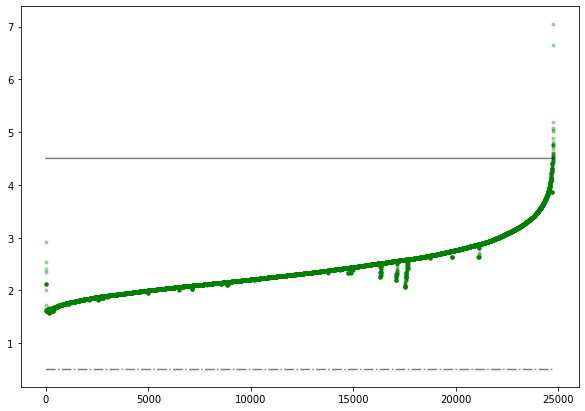

In [90]:
space = np.arange(len(X))
reachability = optics.reachability_[optics.ordering_]
labels = optics.labels_[optics.ordering_]

plt.figure(figsize=(10, 7))

colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    plt.plot(Xk, Rk, color, alpha=0.3)
plt.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
plt.plot(space, np.full_like(space, 4.5, dtype=float), 'k-', alpha=0.5)
plt.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)

In [91]:
clust= cluster_optics_dbscan(reachability=optics.reachability_,
                                   core_distances=optics.core_distances_,
                                   ordering=optics.ordering_, eps=4)

In [92]:
Counter(clust)

Counter({0: 24592, -1: 147, 1: 13})

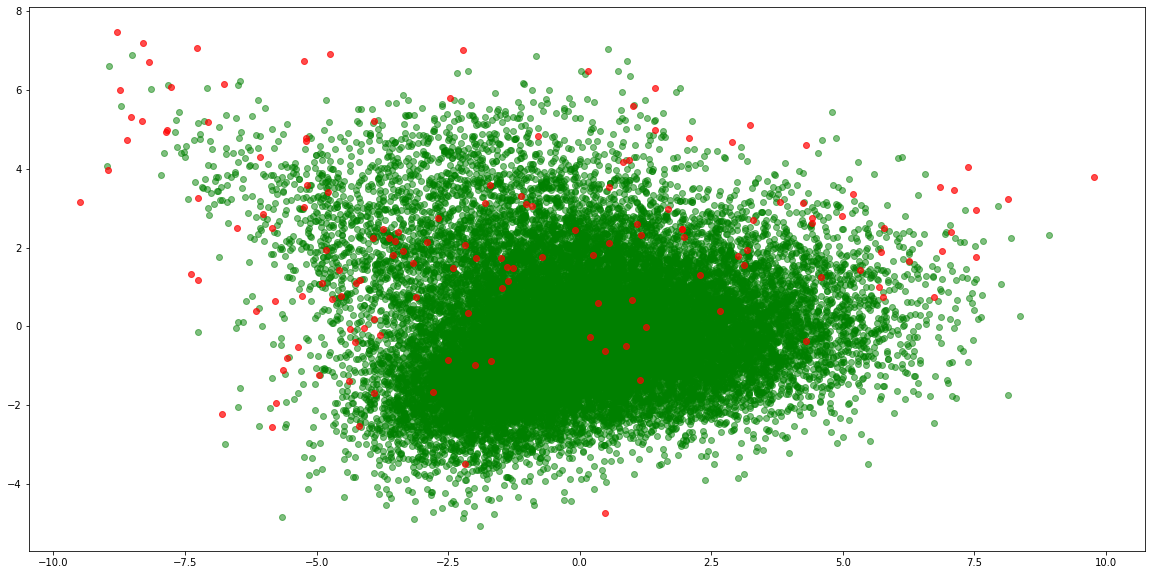

In [93]:
pca= PCA(n_components=3)
X_pca= pca.fit_transform(X)    

plt.scatter(X_pca[clust==0][:,0], X_pca[clust==0][:,1], color='g', alpha=0.5)
plt.scatter(X_pca[clust==-1][:,0], X_pca[clust==-1][:,1], color='r', alpha=0.7)
plt.show()